# Figures for the Paper

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["text.usetex"] = True
plt.rcParams["figure.dpi"] = 150

In [3]:
%load_ext autoreload
%autoreload 2

## introduction

### dataset examples

In [7]:
from deton8.visualization import plot_grid
from deton8.utils import NucleiDataset

In [28]:
raw_train = NucleiDataset(directory="../data/stage1_train/", invert_white_images=False)
raw_train.load(max_size=50)

50image [00:16,  3.03image/s]


In [29]:
raw_metadata = raw_train.metadata_
raw_ims = raw_train.images_
masks = raw_train.masks_

In [6]:
gridsize = (4,6)
indices = np.random.choice(np.arange(len(raw_ims)), size=np.prod(gridsize), replace=False)
plot_ims = raw_ims[indices]
plot_masks = masks[indices]

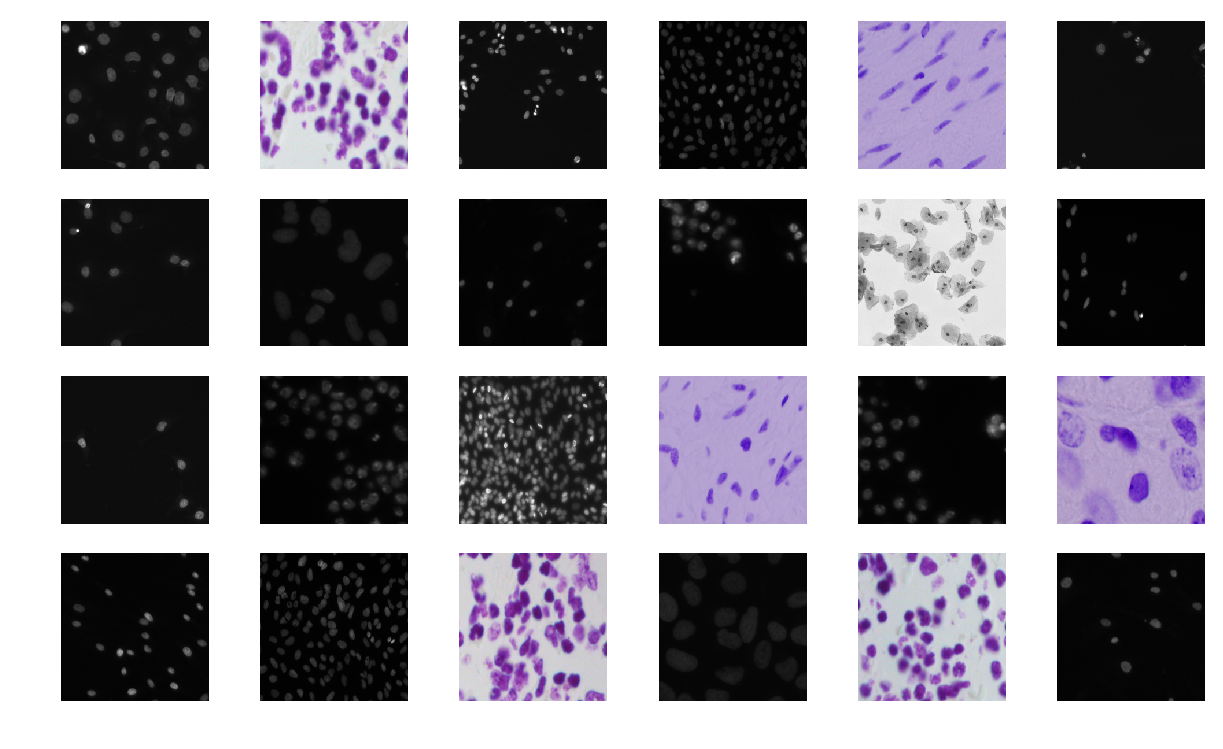

In [7]:
fig = plot_grid(plot_ims, title="", gridsize=(4, 6))
plt.savefig("../paper/figs/dsbowl18-imagegrid-4x6.png", dpi=150)
plt.show()

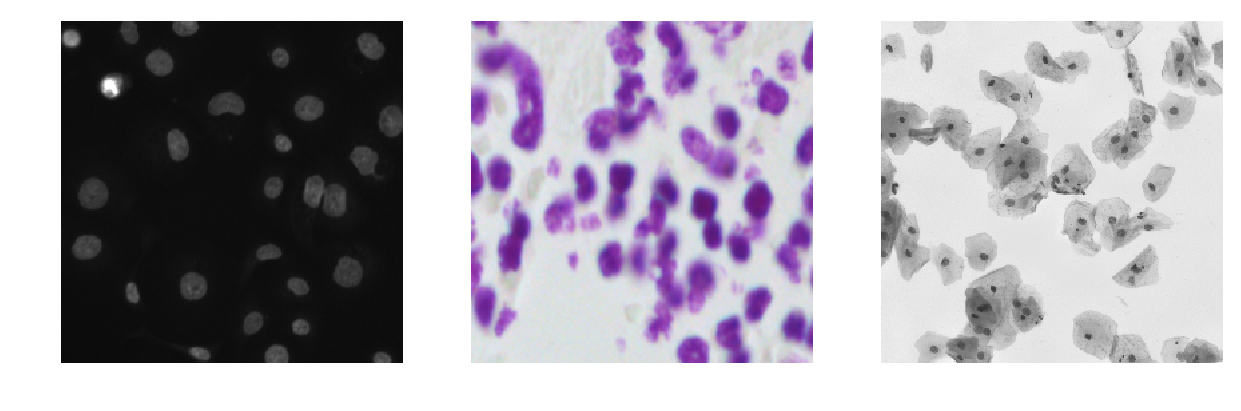

In [44]:
im_idxs = [0, 1, 10]
fig = plot_grid(plot_ims[im_idxs], title="", gridsize=(1, 3))
plt.savefig("../poster/figs/dsbowl18-imagegrid-1x3.png", dpi=150)
plt.show()

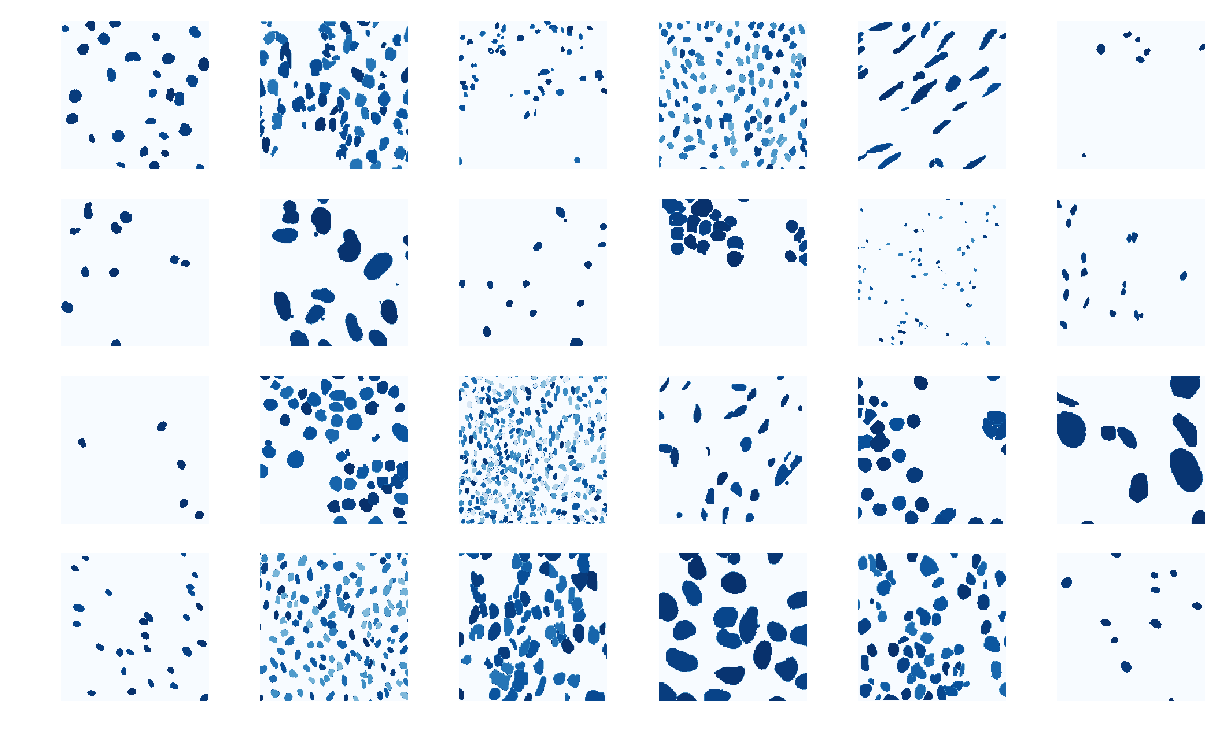

In [9]:
fig = plot_grid(plot_masks, title="", gridsize=(4, 6), cmap='Blues')
plt.savefig("../paper/figs/dsbowl18-imagegrid-masks-4x6.png", dpi=150)
plt.show()

## methods

In [9]:
train = NucleiDataset(directory="../data/stage1_train/")
train.load(max_size=150)
images = train.images_
metadata = train.metadata_
masks = train.masks_

150image [00:45,  3.30image/s]


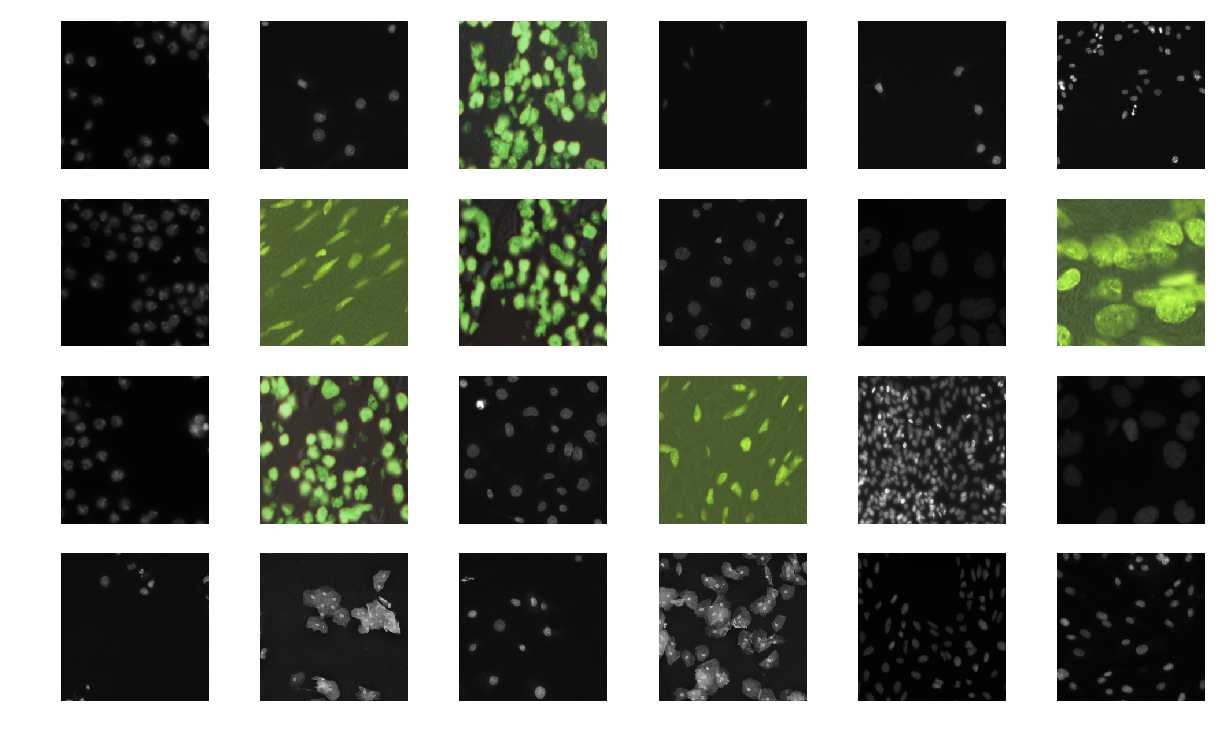

In [10]:
fig = plot_grid(images[:24], title="", gridsize=(4, 6))
plt.show()

### color transfer / pca

In [16]:
from mpl_toolkits.mplot3d import Axes3D

In [19]:
im_data = images.reshape((-1, 3))

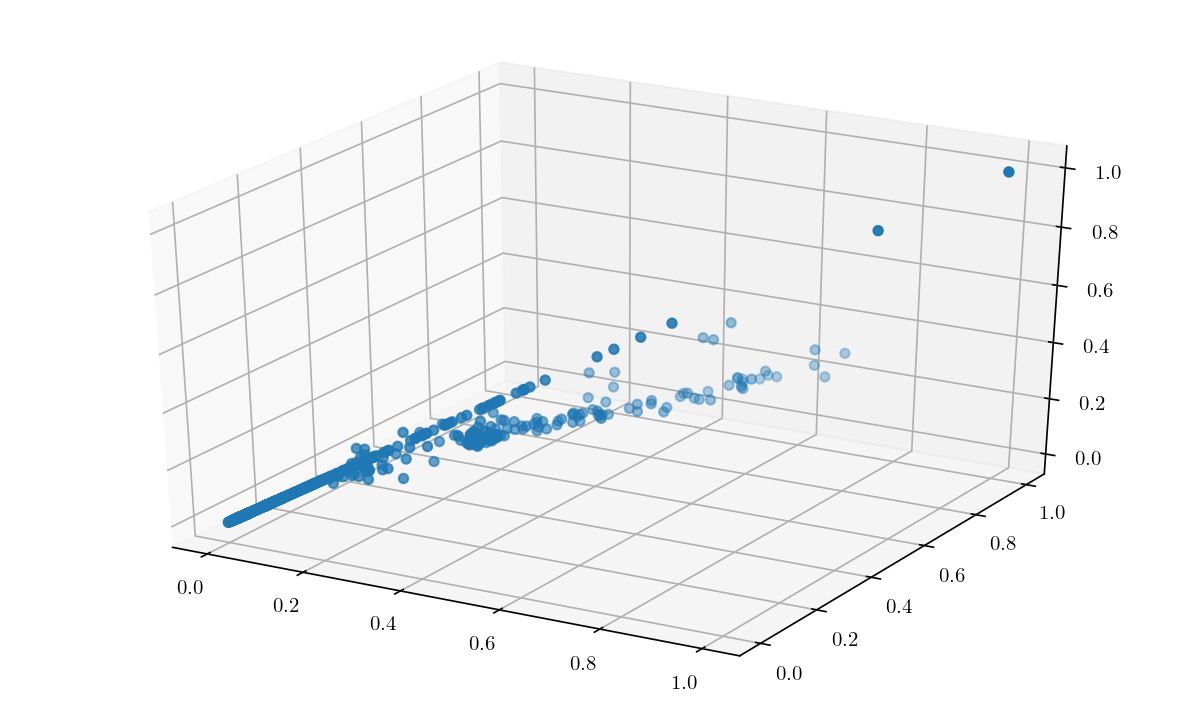

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(*im_data[::10000].T)
plt.savefig("../paper/figs/correlated-features.png", dpi=300)
plt.show()

### raw vs whitened data

In [11]:
from sklearn.decomposition import PCA
from deton8.processing import Preprocesser

In [12]:
preprocesser = Preprocesser()

In [13]:
preprocessed = preprocesser.fit_transform(images[:20])

In [30]:
im_idxs = np.array([8, 14, 19])
raw_plots = raw_ims[im_idxs]
processed_plots = preprocessed[im_idxs][:, :, :, 0]

In [40]:
preprocesser.named_steps.whitener.explained_variance_ratio_

array([0.97029531])

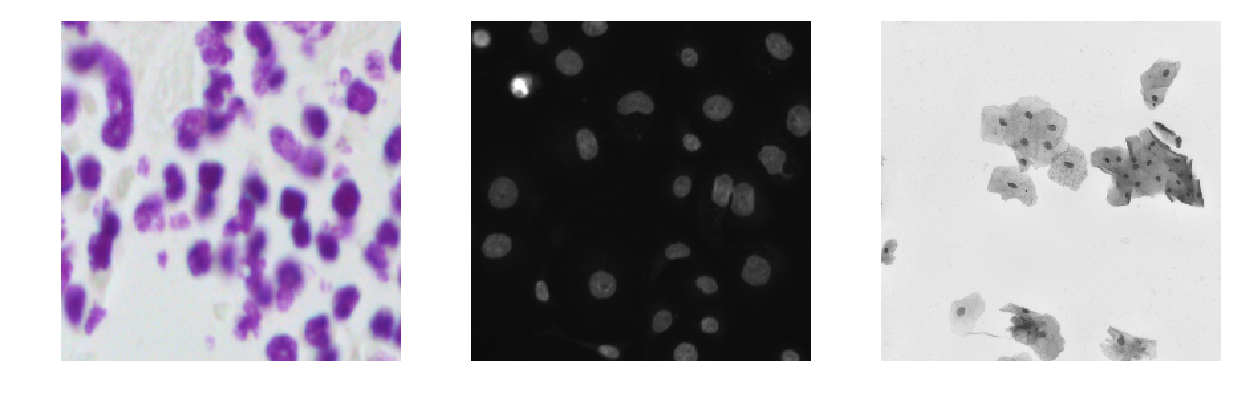

In [38]:
fig = plot_grid(raw_plots, title="", gridsize=(1, 3), figsize=(10, 3))
plt.savefig("../paper/figs/raw-modalities.png")
plt.show()

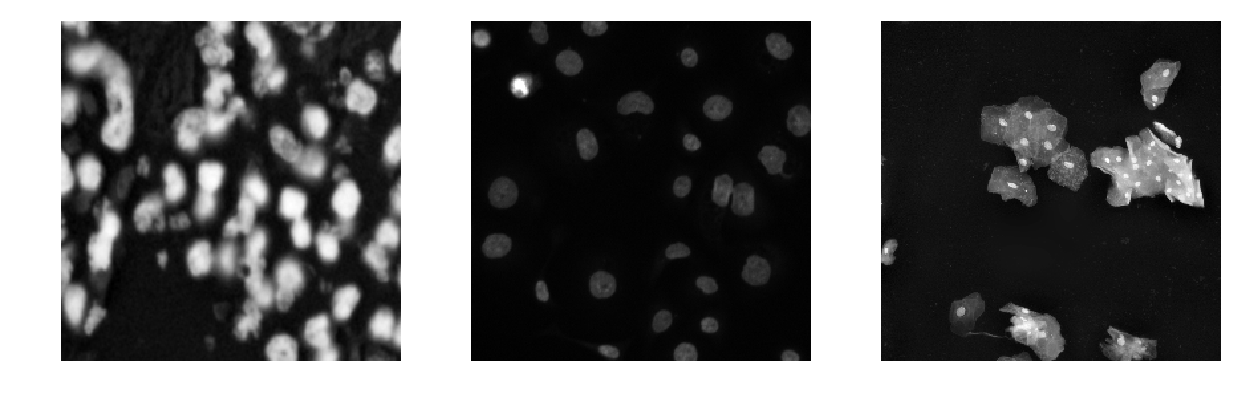

In [37]:
fig = plot_grid(images=processed_plots, title="", gridsize=(1, 3), cmap='gray', figsize=(10, 3))
plt.savefig("../paper/figs/processed-modalities.png")
plt.show()

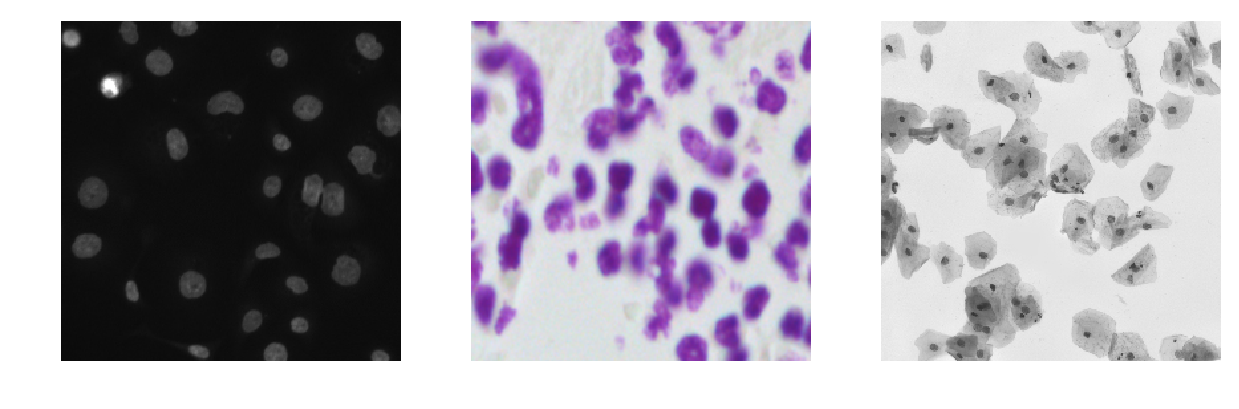

In [59]:
im_idxs = [0, 1, 10]
fig = plot_grid(plot_ims[im_idxs], title="", gridsize=(1, 3), figsize=(10, 3))
plt.savefig("../poster/figs/dsbowl18-imagegrid-1x3.png", dpi=300)
plt.show()

In [52]:
plot_images = images[indices][im_idxs]
plot_ims_whitened = pca.transform(plot_images.reshape((-1, 3))).reshape((*plot_images.shape[:3]))

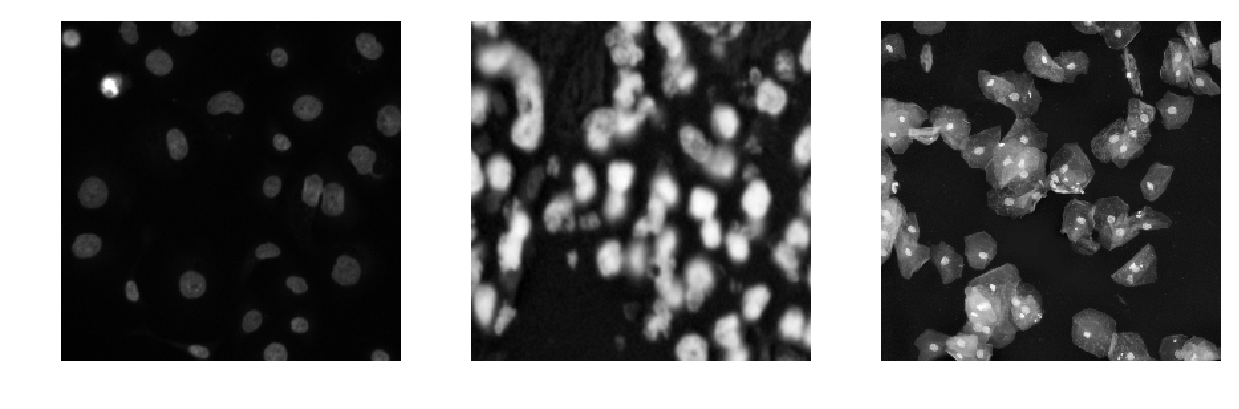

In [60]:
fig = plot_grid(plot_ims_whitened, title="", gridsize=(1, 3), cmap='gray', figsize=(10, 3))
plt.savefig("../poster/figs/dsbowl18-imagegrid-1x3-whitened.png", dpi=300)
plt.show()

In [21]:
small_im_data = images[:50].reshape((-1, 3))

In [24]:
wr = whitened.reshape((50, 256, 256, 1))

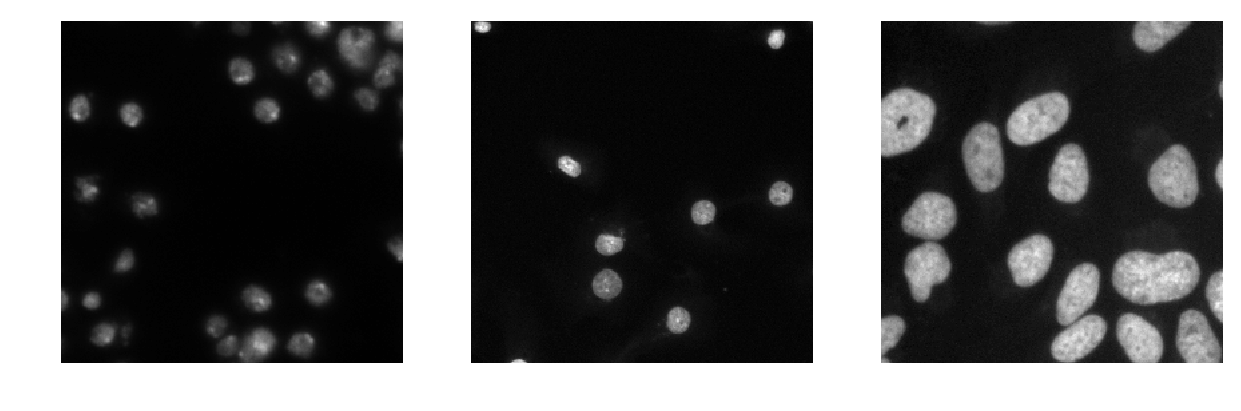

In [45]:
fig = plot_grid(wr[im_idxs, :, :, 0], title="", gridsize=(1, 3), cmap='gray')
plt.show()

## hand-designed features

In [41]:
from deton8.features import BasisTransformer

transformer = BasisTransformer()

In [42]:
transformed = transformer.fit_transform(preprocessed)

100%|██████████| 20/20 [00:00<00:00, 23.50pair/s]


In [55]:
np.rollaxis(trans_im, 3).shape

(6, 3, 256, 256)

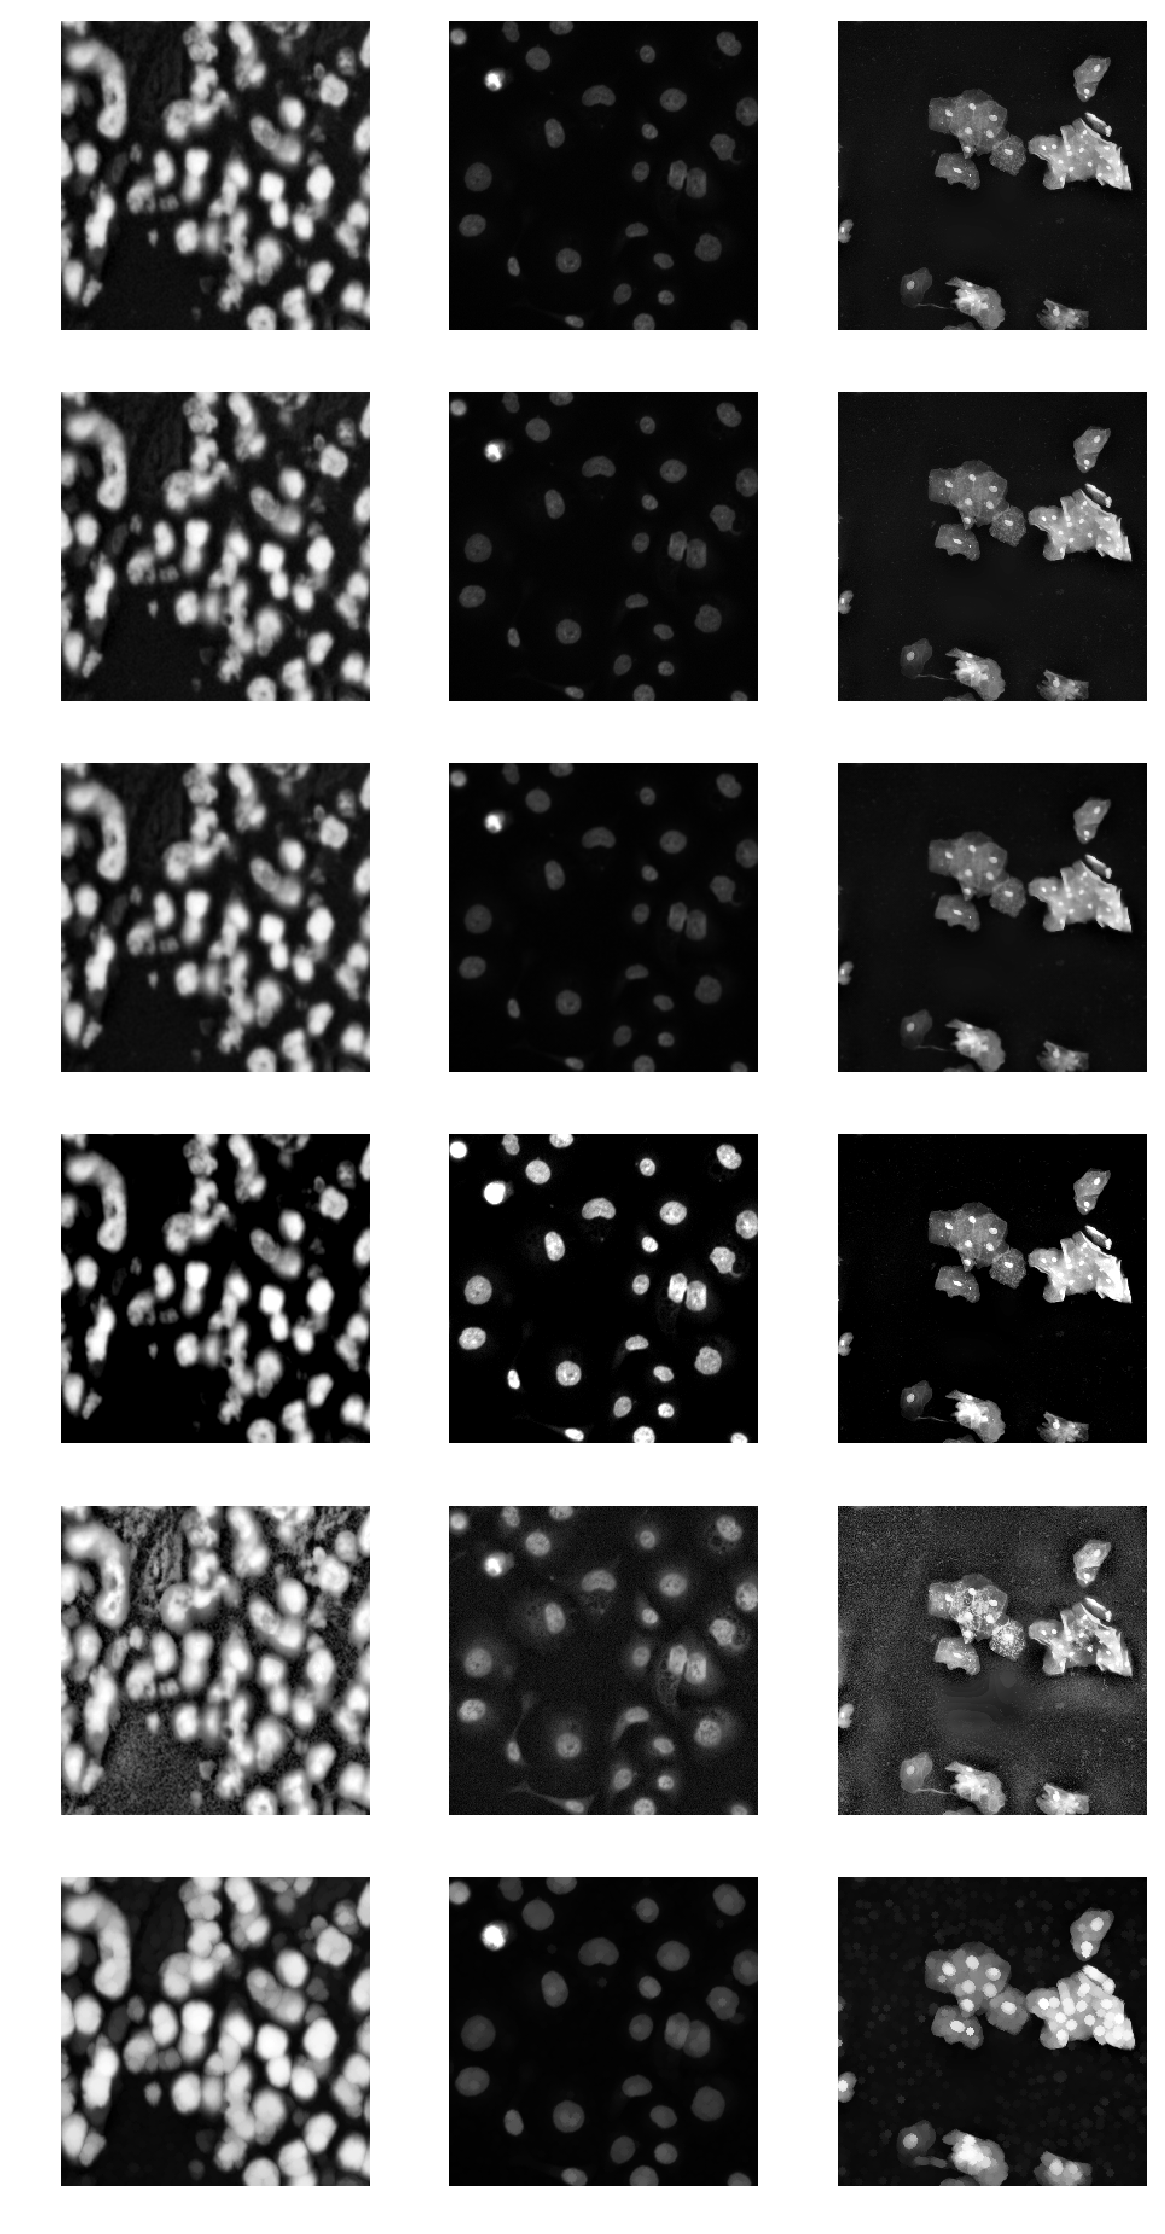

In [62]:
trans_im = transformed[im_idxs]
plot_trans = np.rollaxis(trans_im, 3).reshape((18, 256, 256))
fig = plot_grid(plot_trans, gridsize=(6, 3), figsize=(8, 15), cmap="gray", title="")
plt.tight_layout()
plt.savefig("../paper/figs/hand-designed-features.png")
plt.show()

## linear model outputs

In [65]:
weights = np.load("../weights/linear_pipeline_regressor_weights.npz")
sgd_coef = weights["sgd"]
pa_coef = weights["pa"]

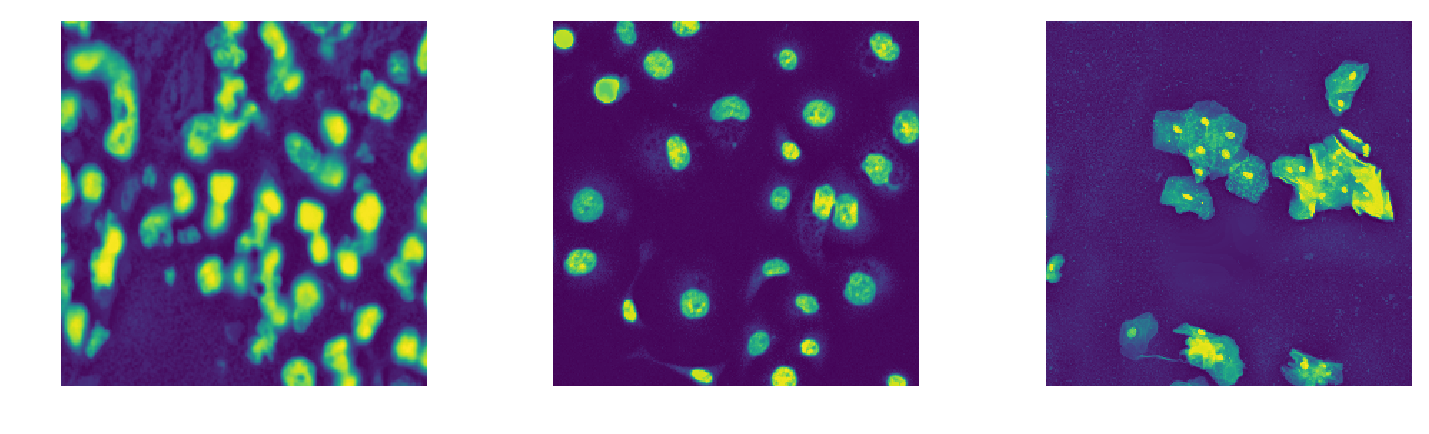

In [76]:
fig = plot_grid(trans_im.dot(sgd_coef), title="", gridsize=(1, 3), figsize=(10, 3), cmap=None)
plt.tight_layout()
plt.savefig("../paper/figs/sgd-output.png")
plt.show()

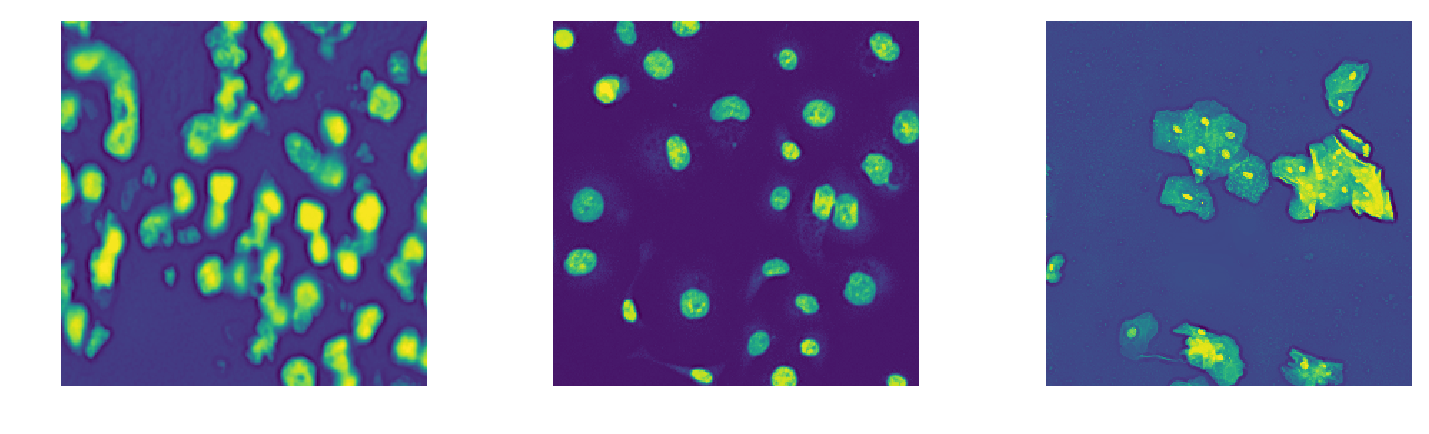

In [77]:
fig = plot_grid(trans_im.dot(pa_coef), title="", gridsize=(1, 3), figsize=(10, 3), cmap=None)
plt.tight_layout()
plt.savefig("../paper/figs/pa-output.png")
plt.show()

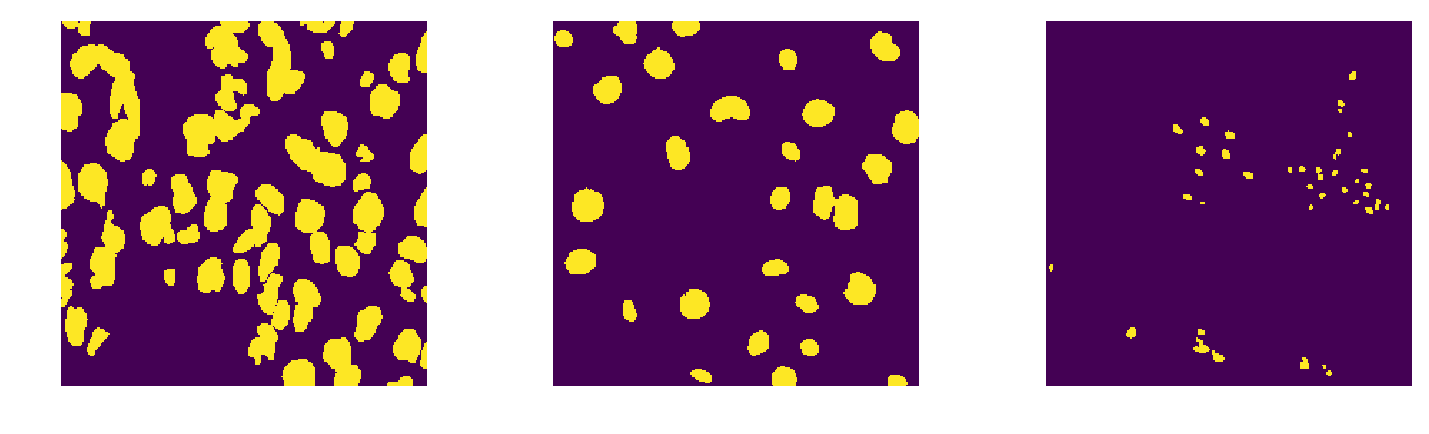

In [83]:
fig = plot_grid(masks[im_idxs] > 0, title="", gridsize=(1, 3), figsize=(10, 3), cmap=None)
plt.tight_layout()
plt.savefig("../paper/figs/ground-truth-binary.png")
plt.show()

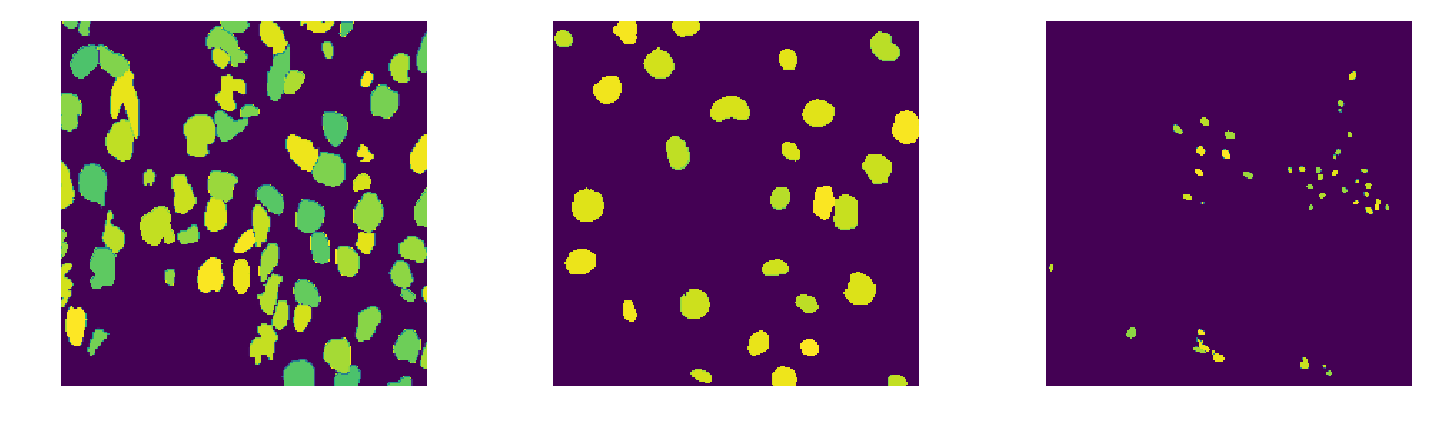

In [84]:
fig = plot_grid(masks[im_idxs], title="", gridsize=(1, 3), figsize=(10, 3), cmap=None)
plt.tight_layout()
plt.savefig("../paper/figs/ground-truth.png")
plt.show()

## unet

In [90]:
sgd_pred = trans_im.dot(sgd_coef)[:, :, :, np.newaxis]
pa_pred = trans_im.dot(pa_coef)[:, :, :, np.newaxis]

In [92]:
plot_extended = np.concatenate([trans_im, sgd_pred, pa_pred], axis=3)

In [85]:
from deton8.models import UNet

unet = UNet(numchannels=8)
unet.load_weights("../weights/unet_weights.h5")

In [95]:
unet_pred = unet.predict(plot_extended)[:, :, :, 0]

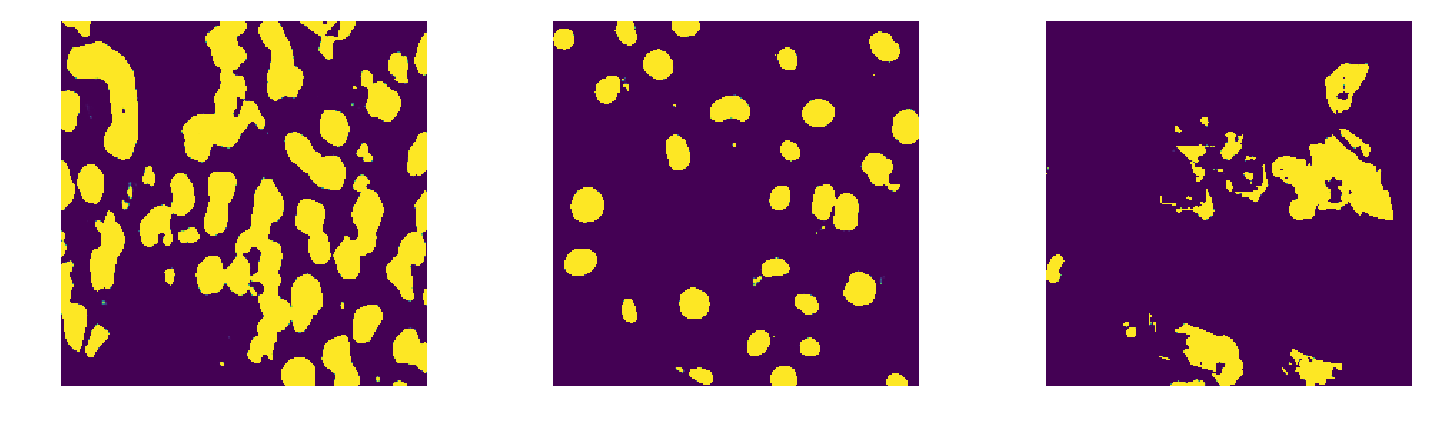

In [97]:
fig = plot_grid(unet_pred, gridsize=(1, 3), figsize=(10, 3), title="", cmap=None)
plt.tight_layout()
plt.savefig("../paper/figs/unet-output.png")

## segmentation

In [99]:
from deton8.components import NucleiSegmenter

ns = NucleiSegmenter()

In [103]:
plot_seg = ns.fit_transform(unet_pred.astype(np.int16), processed_plots)

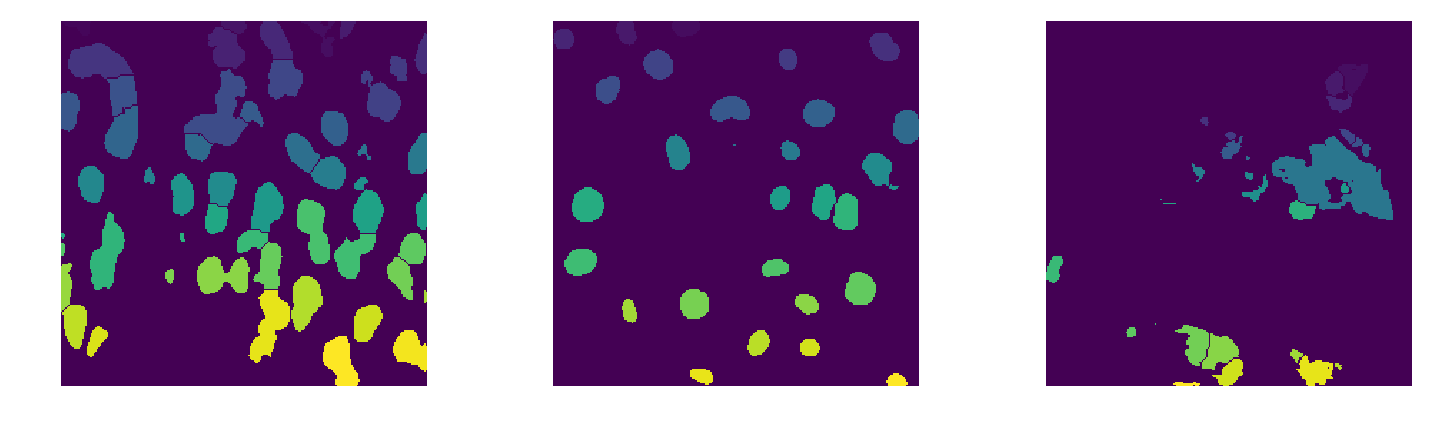

In [105]:
fig = plot_grid(plot_seg, gridsize=(1, 3), figsize=(10, 3), title="", cmap=None)
plt.tight_layout()
plt.savefig("../paper/figs/segmentation.png")

In [61]:
from skimage.io import imread

In [62]:
seg = imread("../poster/figs/seg.png")

In [69]:
cropped = seg[10:225,30:245]

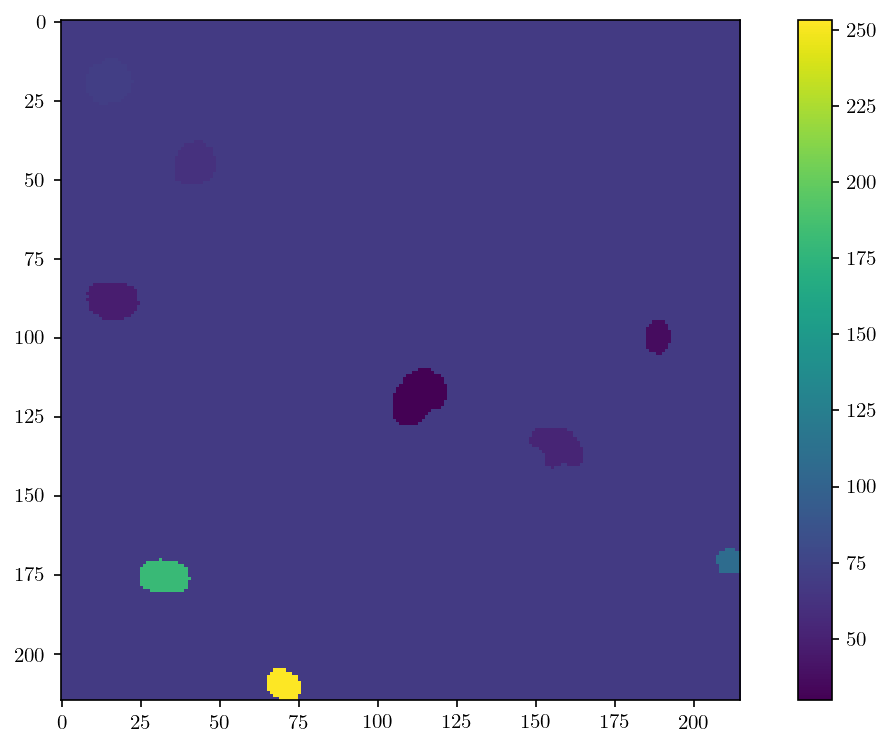

In [73]:
plt.imshow(cropped[:, :, 0])
plt.colorbar()

In [75]:
cropped = cropped[:, :, 0]

In [78]:
mask = seg[:, :, 0] == 181

In [79]:
from scipy.ndimage import find_objects

In [82]:
sliceX, sliceY = find_objects(mask)[0]

In [84]:
dt = imread("../poster/figs/dt.png")
apeaks = imread("../poster/figs/avant_peaks.png")
dpeaks = imread("../poster/figs/derriere_peaks.png")

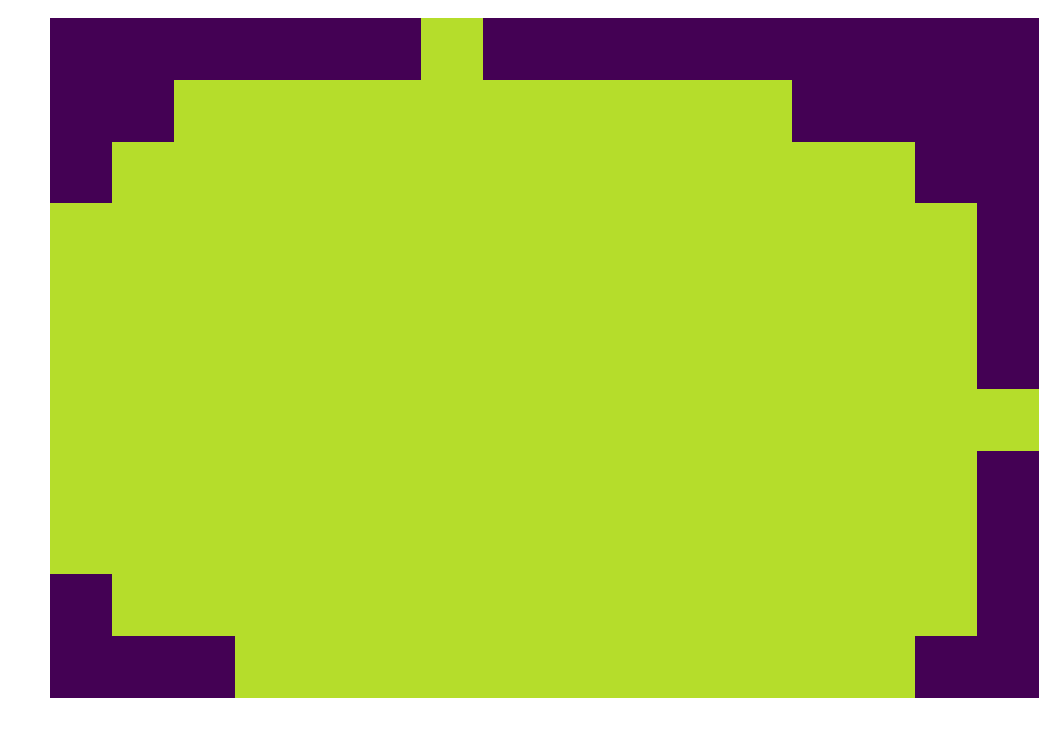

In [91]:
seg_nuc = seg[sliceX, sliceY]
plt.imshow(seg_nuc)
plt.axis('off')
plt.savefig("../poster/figs/seg_nuc.png")
plt.show()

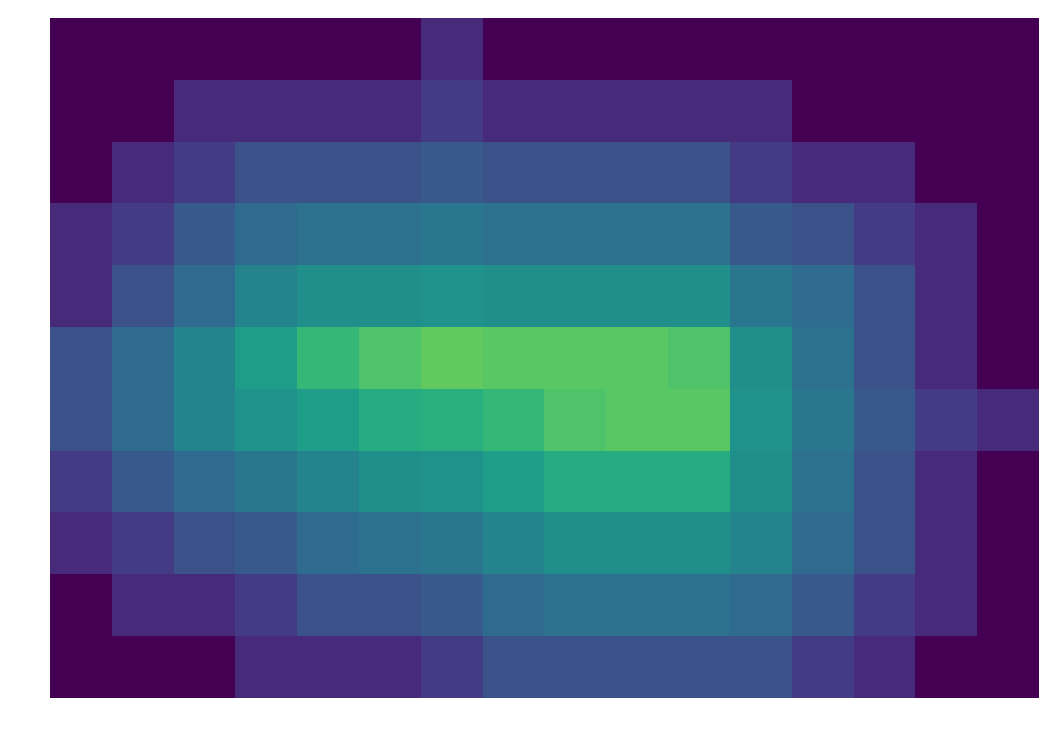

In [88]:
dt_nuc = dt[sliceX, sliceY]
plt.imshow(dt_nuc)
plt.axis('off')
plt.savefig("../poster/figs/dt.png")
plt.show()

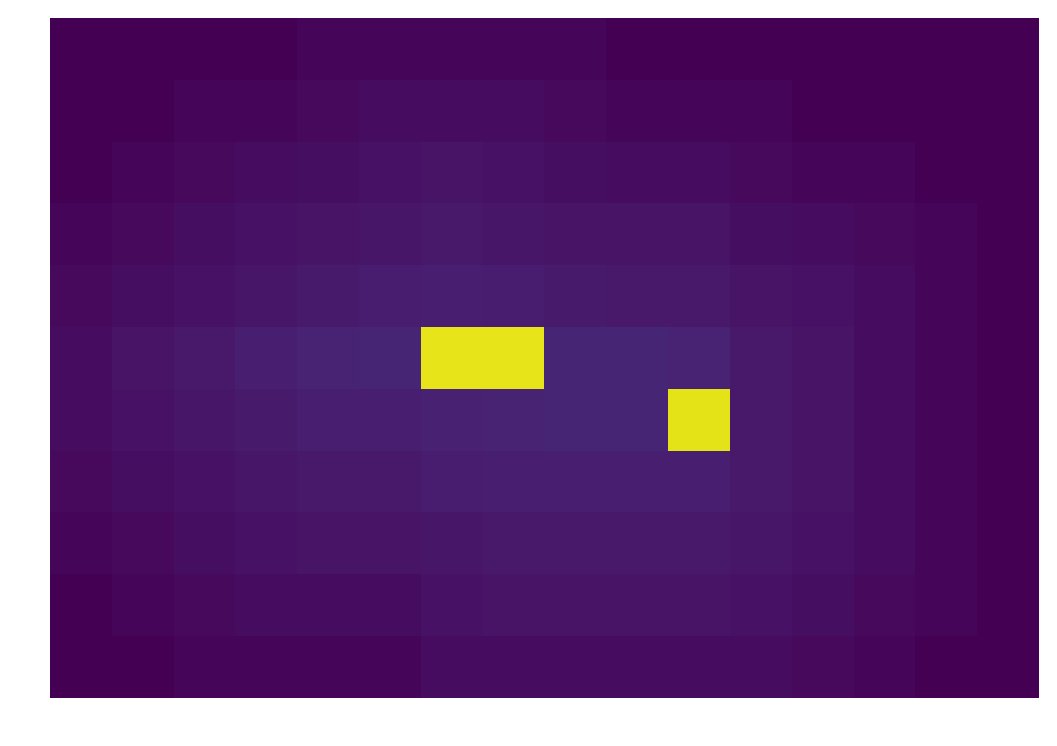

In [89]:
apeak_nuc = apeaks[sliceX, sliceY]
plt.imshow(apeak_nuc)
plt.axis('off')
plt.savefig("../poster/figs/avant_peaks.png")
plt.show()

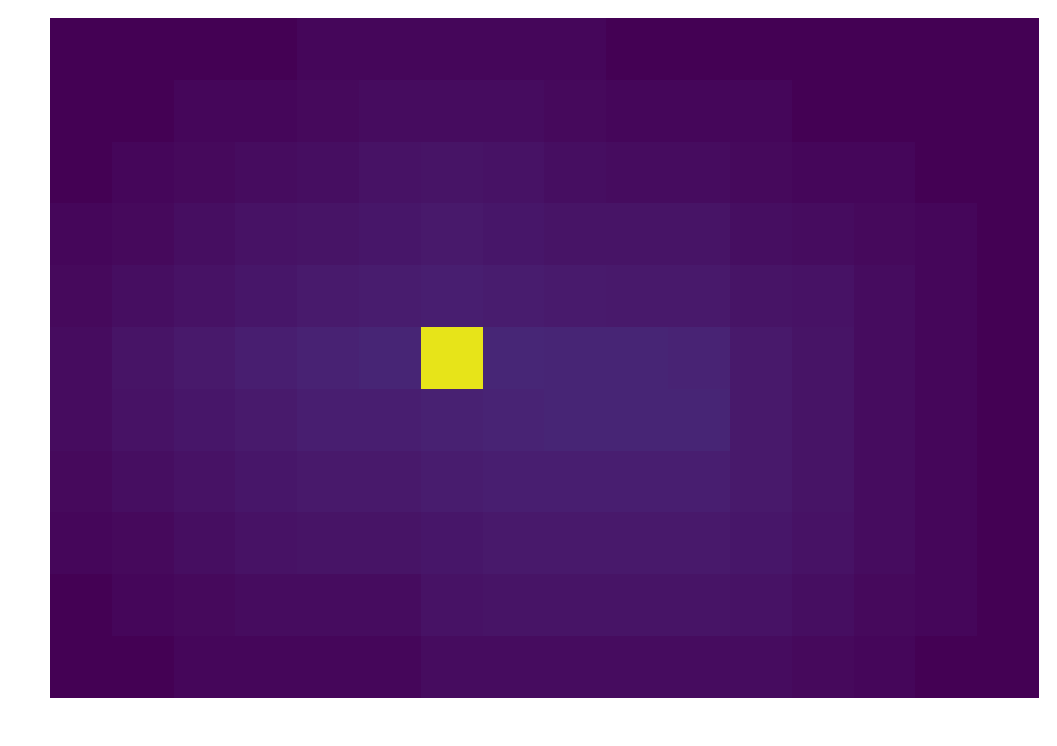

In [90]:
dpeak_nuc = dpeaks[sliceX, sliceY]
plt.imshow(dpeak_nuc)
plt.axis('off')
plt.savefig("../poster/figs/derriere_peaks.png")
plt.show()